In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import sqrt
from skimage import data
from skimage.feature import blob_doh
from skimage.color import rgb2gray
from sklearn.cluster import KMeans

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_points_on_image(raw_image, input_points, input_labels=None):
    plt.figure(figsize=(10,10))
    plt.imshow(raw_image)
    input_points = np.array(input_points)
    if input_labels is None:
      labels = np.ones_like(input_points[:, 0])
    else:
      labels = np.array(input_labels)
    show_points(input_points, labels, plt.gca())
    plt.axis('on')
    plt.show()

### retrieving masks from numpy cache

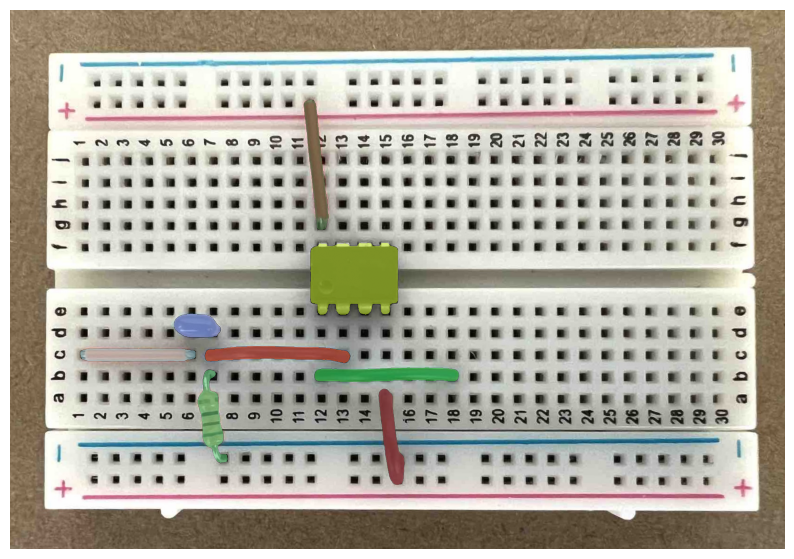

In [4]:
image = cv2.imread('../images/simple.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# read sorted_masks.npy
sorted_masks = np.load('sorted_masks.npy')

plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in sorted_masks:
    show_mask(mask, plt.gca(), random_color=True)
plt.axis('off')
plt.show()

In [ ]:
for mask in sorted_masks:
    # identify what each mask is
    # add it to the list of objects on this breadboard
    # match the pins of the object to the pins on the breadboard (find the closest breadboard keypoint)
    # if resistor, you could identify the value bt the color bands too, and infer the location of other objects
    pass

In [17]:
input_boxes = [[90, 97, 1590, 1065]]
def identify_raw_keypoints(img):

    # identify blobs in the image and constrain them to the input boxes
    detector = cv2.SimpleBlobDetector_create()
    keypoints = detector.detect(img)

    # delete keypoints if they are not in the input boxes
    keypoints = [kp for kp in keypoints if kp.pt[0] > input_boxes[0][0] and kp.pt[0] < input_boxes[0][2] and kp.pt[1] > input_boxes[0][1] and kp.pt[1] < input_boxes[0][3]]

    # sort keypoints by y coordinate
    keypoints.sort(key=lambda x: x.pt[1])
    keypoints = [kp.pt for kp in keypoints]
    keypoints = np.array(keypoints, dtype=np.int32)

    # print the total number of keypoints
    print("Total number of keypoints: {}".format(len(keypoints)))

    return keypoints

Total number of keypoints: 373


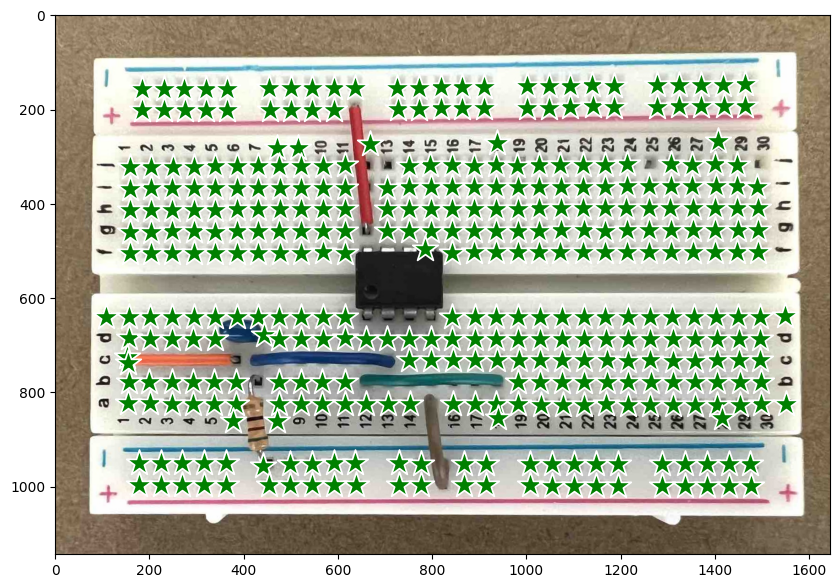

In [23]:
raw_keypoints = identify_raw_keypoints(image)
show_points_on_image(image, raw_keypoints)